# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [3]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/HomeCredit/'

### 之前做過的處理

In [4]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [74]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365


bin = np.linspace(0,app_train['YEARS_BIRTH'].max()+1,11)
label = np.linspace(0,18,19)

app_train['YEARS_BIRTH_BIN'] = pd.cut(app_train['YEARS_BIRTH'],bins = bin)

app_train['YEARS_BIRTH_BIN'].head()



0    (21.036, 28.048]
1    (42.072, 49.084]
2    (49.084, 56.096]
3    (49.084, 56.096]
4    (49.084, 56.096]
Name: YEARS_BIRTH_BIN, dtype: category
Categories (10, interval[float64]): [(0.0, 7.012] < (7.012, 14.024] < (14.024, 21.036] < (21.036, 28.048] ... (42.072, 49.084] < (49.084, 56.096] < (56.096, 63.108] < (63.108, 70.121]]

In [84]:
age_grp = app_train.groupby('YEARS_BIRTH_BIN').mean()
age_grp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH
YEARS_BIRTH_BIN,,,,,,,,,,,,,,,,,,,,,
"(0.0, 7.012]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(7.012, 14.024]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(14.024, 21.036]",291944.000000,0.142857,0.571429,0.142857,0.857143,0.285714,108421.071429,349210.285714,17827.071429,334928.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.0,20.958121
"(21.036, 28.048]",277606.636593,0.115897,0.177514,0.350350,0.611792,0.352369,154973.090580,460357.199001,23762.927408,415498.706359,...,0.000808,0.002961,0.008536,0.008059,0.033017,0.177477,0.265479,1.696737,0.0,25.391884
"(28.048, 35.06]",277945.983607,0.105115,0.096982,0.405083,0.623447,0.761892,175403.554614,558732.573606,27187.437313,502167.180378,...,0.000670,0.000091,0.006314,0.007468,0.034758,0.281045,0.252601,1.786227,0.0,31.540525
"(35.06, 42.072]",278137.556895,0.086923,0.096211,0.403639,0.667222,0.797873,179901.086769,630952.315983,28365.754494,567631.782887,...,0.000583,0.000133,0.006018,0.006864,0.033962,0.283638,0.263892,1.838690,0.0,38.598641
"(42.072, 49.084]",278644.515768,0.075465,0.091612,0.373707,0.721999,0.399234,181523.728802,663795.087244,28971.532959,594498.457508,...,0.000663,0.000000,0.006789,0.006293,0.033512,0.302235,0.255512,1.880110,0.0,45.449054
"(49.084, 56.096]",278381.124453,0.066288,0.082285,0.309227,0.737873,0.110404,170391.807446,654252.276259,28100.690694,587917.131135,...,0.000352,0.000021,0.006001,0.006763,0.036671,0.288296,0.265627,1.948113,0.0,52.650747
"(56.096, 63.108]",278368.518193,0.054018,0.078299,0.228752,0.760908,0.027238,152445.580541,623168.884856,26257.224309,560777.742832,...,0.000183,0.000023,0.006453,0.007315,0.034093,0.258791,0.279560,2.084252,0.0,59.443840


<BarContainer object of 10 artists>

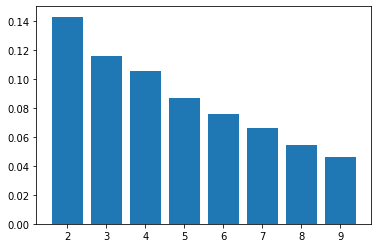

In [85]:
x = range(len(age_grp.index))
y = age_grp['TARGET']
plt.bar(x, y)
